# Chapter 2
# tensor 1d

In [1]:
import numpy as np

tensor_1d = np.array([1.3,1,4.0,23.99])
print(tensor_1d)
print(tensor_1d[0])
print(tensor_1d[2])

[  1.3    1.     4.    23.99]
1.3
4.0


In [2]:
import tensorflow as tf

tf_tensor = tf.convert_to_tensor(tensor_1d, dtype=tf.float64)
with tf.Session() as sess:
    print(sess.run(tf_tensor))
    print(sess.run(tf_tensor[0]))
    print(sess.run(tf_tensor[2]))

[  1.3    1.     4.    23.99]
1.3
4.0


In [3]:
tensor_2d=np.array([(1,2,3,4),(4,5,6,7),(8,9,10,11),(12,13,14,15)])
print(tensor_2d)
print(tensor_2d[3][3])
print(tensor_2d[0:2,0:2])

[[ 1  2  3  4]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
15
[[1 2]
 [4 5]]


In [5]:
tf_tensor=tf.placeholder("float64", tensor_2d, name='x') #float64
with tf.Session() as sess:
    print(sess.run(x))

TypeError: only length-1 arrays can be converted to Python scalars

# Load Image Data

In [6]:
#handling tensors
#STEP 1 --- PREPARE THE DATA
import matplotlib.image as mp_image
filename = "packt.jpeg"
input_image = mp_image.imread(filename)

#dimension
print('input dim = {}'.format(input_image.ndim))
#shape
print('input shape = {}'.format(input_image.shape))

input dim = 3
input shape = (80, 144, 3)


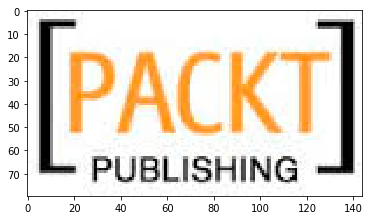

In [7]:
import matplotlib.pyplot as plt
plt.imshow(input_image)
plt.show()

# Slice Image

(16, 144, 3)


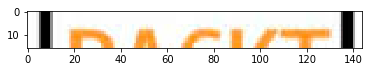

In [10]:
my_image = tf.placeholder("uint8", [None,None,3])
slice = tf.slice(my_image, [10,0,0], [16,-1,-1])

with tf.Session() as session:
    result = session.run(slice,feed_dict={my_image: input_image})
    print(result.shape)

plt.imshow(result)
plt.show()

# Transpose Image

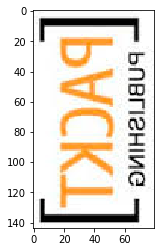

In [11]:
x = tf.Variable(input_image, name='x')
model = tf.global_variables_initializer()

with tf.Session() as session:
    x = tf.transpose(x, perm=[1,0,2])
    session.run(model)
    result=session.run(x)

plt.imshow(result)
plt.show()

In [16]:
#MANDELBROT SET
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005]

#JULIA SET
#Y, X = np.mgrid[-2:2:0.005, -2:2:0.005]
print(X)
print(Y)

[[-2.    -1.995 -1.99  ...,  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...,  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...,  0.985  0.99   0.995]
 ..., 
 [-2.    -1.995 -1.99  ...,  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...,  0.985  0.99   0.995]
 [-2.    -1.995 -1.99  ...,  0.985  0.99   0.995]]
[[-1.3   -1.3   -1.3   ..., -1.3   -1.3   -1.3  ]
 [-1.295 -1.295 -1.295 ..., -1.295 -1.295 -1.295]
 [-1.29  -1.29  -1.29  ..., -1.29  -1.29  -1.29 ]
 ..., 
 [ 1.285  1.285  1.285 ...,  1.285  1.285  1.285]
 [ 1.29   1.29   1.29  ...,  1.29   1.29   1.29 ]
 [ 1.295  1.295  1.295 ...,  1.295  1.295  1.295]]


In [17]:
#Definiamo il punto corrente 
Z = X+1j*Y
print(Z)

[[-2.000-1.3j   -1.995-1.3j   -1.990-1.3j   ...,  0.985-1.3j    0.990-1.3j
   0.995-1.3j  ]
 [-2.000-1.295j -1.995-1.295j -1.990-1.295j ...,  0.985-1.295j
   0.990-1.295j  0.995-1.295j]
 [-2.000-1.29j  -1.995-1.29j  -1.990-1.29j  ...,  0.985-1.29j   0.990-1.29j
   0.995-1.29j ]
 ..., 
 [-2.000+1.285j -1.995+1.285j -1.990+1.285j ...,  0.985+1.285j
   0.990+1.285j  0.995+1.285j]
 [-2.000+1.29j  -1.995+1.29j  -1.990+1.29j  ...,  0.985+1.29j   0.990+1.29j
   0.995+1.29j ]
 [-2.000+1.295j -1.995+1.295j -1.990+1.295j ...,  0.985+1.295j
   0.990+1.295j  0.995+1.295j]]


In [19]:
c = tf.constant(Z.astype("complex64"))

zs = tf.Variable(c)
ns = tf.Variable(tf.zeros_like(c, "float32"))

#c = complex(0.0,0.75)
#c = complex(-1.5,-1.5)

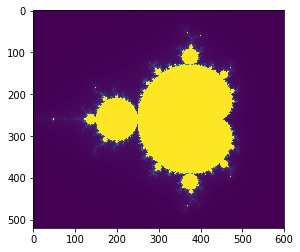

In [18]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

# Compute the new values of z: z^2 + x
zs_ = zs*zs + c
#zs_ = zs*zs - c

# Have we diverged with this new value?
not_diverged = tf.complex_abs(zs_) < 4

step = tf.group(zs.assign(zs_),
    ns.assign_add(tf.cast(not_diverged, "float32")))

for i in range(200): 
    step.run()

plt.imshow(ns.eval())
plt.show()

In [20]:
x = tf.placeholder(tf.float32)
func =  2*x*x   
var_grad = tf.gradients(func, x)
with tf.Session() as session:
    var_grad_val = session.run(var_grad, feed_dict={[x:1]})
    print(var_grad_val)

SyntaxError: invalid syntax (<ipython-input-20-b0c14d7ed46c>, line 5)

# Random Normal

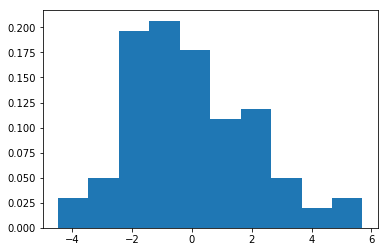

In [21]:
# Create a tensor of shape [100] consisting of random normal values, with mean
# 0 and standard deviation 2.
norm = tf.random_normal([100], mean=0, stddev=2)
with tf.Session() as session:
    plt.hist(norm.eval(), normed=True)
    plt.show()  

[ 0.67713213  0.76911163  0.04547489  0.64024889  0.14450824  0.78014028
  0.04149079  0.30745423  0.65364599  0.46150219  0.70717573  0.7519691
  0.40257967  0.80115771  0.20496023  0.32543981  0.72855055  0.99314344
  0.47332168  0.96106029  0.9777739   0.37454748  0.47162056  0.4220233
  0.60854673  0.54327321  0.05266523  0.67079127  0.9728235   0.9946624
  0.33781123  0.08177185  0.25828052  0.38227749  0.12620056  0.94428539
  0.73413002  0.12518919  0.35547888  0.63355064  0.86645091  0.410061
  0.37207949  0.37429714  0.05472481  0.33519351  0.5465039   0.04978049
  0.74234664  0.89289689  0.32445765  0.63816512  0.68386579  0.80800784
  0.84483254  0.60105228  0.7798053   0.77926838  0.98592508  0.75882733
  0.83605397  0.24713957  0.33129561  0.93368626  0.41257274  0.199476
  0.1407181   0.39986992  0.96597815  0.15762329  0.42239892  0.54201329
  0.85661781  0.72551668  0.50653338  0.23518503  0.21899056  0.36870408
  0.07341444  0.18036282  0.87102294  0.41775441  0.613487

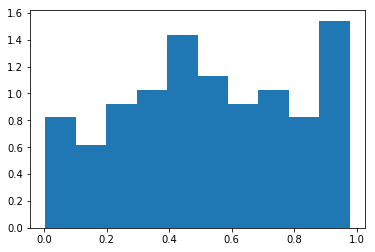

In [22]:
uniform = tf.random_uniform([100], minval=0, maxval=1, dtype=tf.float32)
with tf.Session() as session:
    print(uniform.eval())
    plt.hist(uniform.eval(), normed=True)
    plt.show() 

# Uniform with/without seed

In [28]:
uniform_with_seed = tf.random_uniform([5], seed=1)
uniform_without_seed = tf.random_uniform([5])

# Repeatedly running this block with the same graph will generate the same
# sequence of values for 'a', but different sequences of values for 'b'.
print("First Run")
with tf.Session() as first_session:
    print("uniform with (seed = 1) = {}".format(first_session.run(uniform_with_seed)))  
    print("uniform with (seed = 1) = {}".format(first_session.run(uniform_with_seed)))
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))  
    print("uniform without seed = {}".format(first_session.run(uniform_without_seed)))  

First Run
uniform with (seed = 1) = [ 0.23903739  0.92039955  0.05051243  0.49574447  0.83552229]
uniform with (seed = 1) = [ 0.93370306  0.71884167  0.85377777  0.77928996  0.52497303]
uniform without seed = [ 0.14155388  0.47960389  0.52944231  0.75273681  0.00563633]
uniform without seed = [ 0.44687641  0.69182277  0.13110876  0.07047522  0.24924433]


In [29]:
print("Second Run")
with tf.Session() as second_session:
  print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))  
  print("uniform with (seed = 1) = {}".format(second_session.run(uniform_with_seed)))  
  print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))  
  print("uniform without seed = {}".format(second_session.run(uniform_without_seed)))

Second Run
uniform with (seed = 1) = [ 0.23903739  0.92039955  0.05051243  0.49574447  0.83552229]
uniform with (seed = 1) = [ 0.93370306  0.71884167  0.85377777  0.77928996  0.52497303]
uniform without seed = [ 0.71615982  0.18223262  0.77563918  0.05329466  0.07027328]
uniform without seed = [ 0.44507694  0.93094957  0.93741     0.66257381  0.99354076]


In [ ]:
trials = 100
hits = 0
x = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
y = tf.random_uniform([1],minval=-1,maxval=1,dtype=tf.float32)
pi = []
sess = tf.Session()
with sess.as_default():
    for i in range(1,trials):
        for j in range(1,trials):
            ox = x.eval()
            oy = y.eval()
            if ox**2 + oy**2 < 1 :
                hits = hits + 1
                print(ox, oy, hits)
                pi.append((4 * float(hits) / i)/trials)  

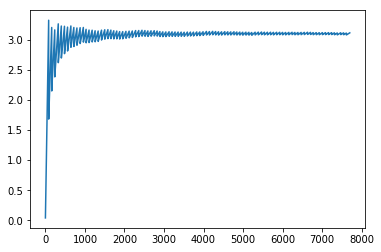

In [32]:
plt.plot(pi)
plt.show()

In [33]:
#Import libraries for simulation
from pde_lib import *  

ImportError: No module named 'pde_lib'

In [34]:
def make_kernel(a):
    """Transform a 2D array into a convolution kernel"""
    a = np.asarray(a)
    a = a.reshape(list(a.shape) + [1,1])
    return tf.constant(a, dtype=1)

def simple_conv(x, k):
    """A simplified 2D convolution operation"""
    x = tf.expand_dims(tf.expand_dims(x, 0), -1)
    y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
    return y[0, :, :, 0]

def laplace(x):
    """Compute the 2D laplacian of an array"""
    laplace_k = make_kernel([[0.5, 1.0, 0.5],
        [1.0, -6., 1.0],
        [0.5, 1.0, 0.5]])
    return simple_conv(x, laplace_k)

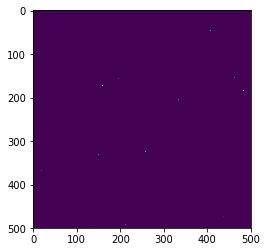

In [35]:
sess = tf.InteractiveSession()

N = 500

# Initial Conditions -- some rain drops hit a pond

# Set everything to zero
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# Some rain drops hit a pond at random points
for n in range(100):
    a,b = np.random.randint(0, N, 2)
    u_init[a,b] = np.random.uniform()

plt.imshow(u_init)
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


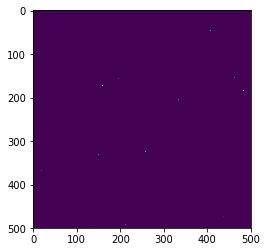

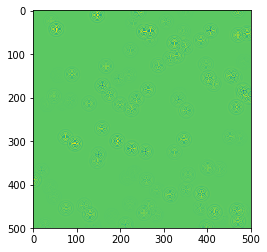

In [36]:
# Parameters:
# eps -- time resolution
# damping -- wave damping
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

# Create variables for simulation state
U  = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

# Operation to update the state
step = tf.group(
    U.assign(U_),
    Ut.assign(Ut_))

# Initialize state to initial conditions
tf.initialize_all_variables().run()

# Run 1000 steps of PDE
for i in range(1000):
    # Step simulation
    step.run({eps: 0.03, damping: 0.04})
    # Visualize every 50 steps
    if i % 500 == 0:
        #clear_output()
        plt.imshow(U.eval())
        plt.show()